# Convolutional Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
traindata = pd.read_csv(r'C:\Users\Chinmay\Desktop\AAI\FinalProject- 646\FinalProject_646-main\FinalProject_646-main\datasets\archive\sign_mnist_train\sign_mnist_train.csv')
testdata = pd.read_csv(r'C:\Users\Chinmay\Desktop\AAI\FinalProject- 646\FinalProject_646-main\FinalProject_646-main\datasets\archive\sign_mnist_test\sign_mnist_test.csv')

In [3]:
traindata.shape


(27455, 785)

In [4]:
testdata.shape

(7172, 785)

<AxesSubplot:ylabel='count'>

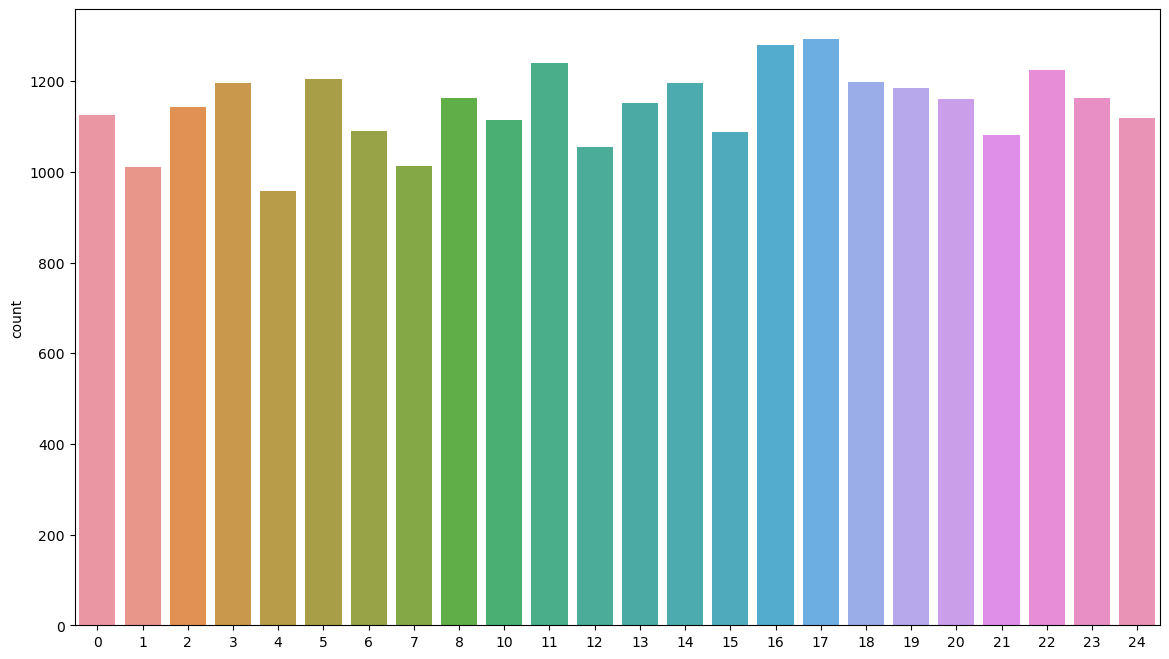

In [5]:
labels = traindata['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels) #data representation by label

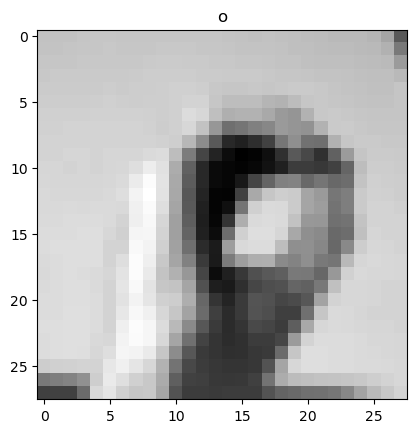

In [6]:
import random as rd
#adding alphabets 
alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
n = rd.randrange(traindata.shape[0])
ar = np.array(traindata.loc[n][1:]).reshape((28,28))
plt.imshow(ar, cmap='gray')
plt.title(alphabet[traindata.loc[n][0]])
plt.show()

In [7]:
#preprocessing the data

y = traindata["label"]
X = traindata.drop(['label'], axis=1)

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((len(alphabet),traindata.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))
#X=traindata.iloc[:,1:]
#y=traindata.iloc[:,:1]

# CNN Model

In [8]:
#Implementation of CNN model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Input

model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1),padding='same')) #Convolution layer
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu',padding='same')) 
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same')) #Maxpooling layer
model.add(tf.keras.layers.Dropout(0.2)) #Dropout

model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(556, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

model.summary()

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [9]:
history = model.fit(X,y,batch_size=64,epochs=3, validation_split=0.2) #training


Epoch 1/3
344/344 [==============================] - 26s 74ms/step - loss: 1.1765 - accuracy: 0.6361 - val_loss: 0.0388 - val_accuracy: 0.9947
Epoch 2/3
344/344 [==============================] - 29s 84ms/step - loss: 0.0540 - accuracy: 0.9823 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/3
344/344 [==============================] - 26s 77ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0065 - val_accuracy: 0.9989


#  Valdating the model using Testing Data

1/1 [==============================] - 0s 139ms/step


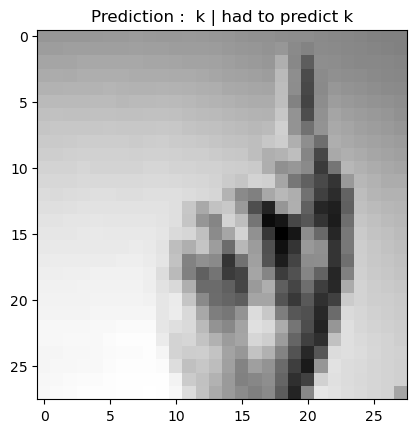

In [10]:
#reading testing data and validating it using CNN model
n = rd.randrange(testdata.shape[0])
y = testdata["label"]
X = testdata.drop(['label'], axis=1)

ar = np.array(testdata.loc[n][1:]).reshape((28,28))

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((26,testdata.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))

plt.imshow(ar, cmap='gray')
plt.title(f"Prediction :  {alphabet[ np.argmax(model.predict(X[n].reshape(1,28,28,1)))]} | had to predict {alphabet[testdata.loc[n][0]]}")
plt.show()

As we can see, model is able to predict the image from the testing data set

<br/>

---------------------------------------------------------

# Support Vector Machine

In [11]:
#importing essential libs
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/sign-language-mnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC


In [4]:
df = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

In [5]:
x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values


In [6]:
x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

In [7]:
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)


In [8]:
classifier = SVC(decision_function_shape='ovr')

In [9]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [10]:

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test,y_pred)

print(cm)
print(f1)
print(acc)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0
    0  26   0  23

--------------------------------

# K-Nearest Neighbor

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
train_dataset = './datasets/archive/sign_mnist_train.csv'
test_dataset= './datasets/archive/sign_mnist_test.csv'

In [21]:
train_df = pd.read_csv(train_dataset)
test_df = pd.read_csv(test_dataset)

In [43]:
train_df.head(40)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


============================================================================================================================

## KNN

x_train has 27455 images of 785 pixels

In [5]:
x_train = train_df.iloc[0:20000, 1:785].values
y_train = train_df.iloc[0:20000, 0].values

test data has 7172 images 

In [6]:
x_test = test_df.iloc[0:5000, 1:785].values
y_test = test_df.iloc[0:5000,0].values

### Standard Scaler

In [22]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x-mean)**2 for x in data]
    variance = sum(deviations) / n
    return variance

In [23]:
def std(data):
    return np.sqrt(variance(data))

In [24]:
def normalize(data):
    mean = sum(data) / len(data)
    standardDev = std(data)
    normalized=[]
    for i in data:
        norm = (i - mean) / standardDev
        normalized.append(norm)
    return np.array(normalized)

============================================================================================================================

### K-Nearest Neighbor algorithm

In [7]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [8]:
def euclidean(point, data):
    return np.sqrt(np.sum((point-data)**2, axis=1))

In [9]:
def manhattan(point, data):
    return np.sum((point-data), axis=1)

In [10]:
class KNN():
    def __init__(self, k, dist_metric):
        self.k = k
        self.dist_metric = dist_metric    
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors=[]
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])        
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

============================================================================================================================

### Training 

#### Manhattan distance, Training size 10000 samples

In [55]:
x_train = train_df.iloc[0:10000, 1:785].values
y_train = train_df.iloc[0:10000, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

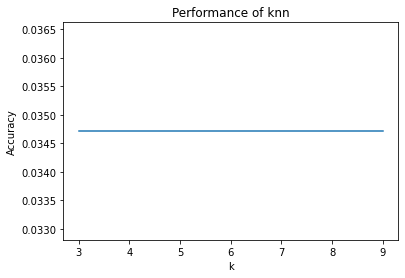

In [56]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=manhattan)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [57]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.03471428571428571
k=5  0.03471428571428571
k=7  0.03471428571428571
k=9  0.03471428571428571


<br/>

#### Manhattan distance, Training size 27455 samples

In [58]:
x_train = train_df.iloc[0:27455, 1:785].values
y_train = train_df.iloc[0:27455, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

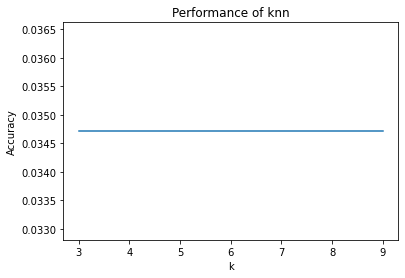

In [59]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=manhattan)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [60]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.03471428571428571
k=5  0.03471428571428571
k=7  0.03471428571428571
k=9  0.03471428571428571


<br/>

#### Euclidean distance. Training 10000 samples.

In [61]:
x_train = train_df.iloc[0:10000, 1:785].values
y_train = train_df.iloc[0:10000, 0].values
x_test = test_df.iloc[0:7000, 1:785].values
y_test = test_df.iloc[0:7000,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

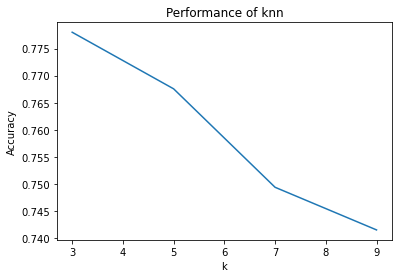

In [62]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=euclidean)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [63]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.778
k=5  0.7675714285714286
k=7  0.7494285714285714
k=9  0.7415714285714285


<br/>

#### Euclidean distance. Training size 27455.

In [64]:
x_train = train_df.iloc[0:27455, 1:785].values
y_train = train_df.iloc[0:27455, 0].values
x_test = test_df.iloc[0:7172, 1:785].values
y_test = test_df.iloc[0:7172,0].values

x_train = normalize(x_train)
x_test = normalize(x_test)

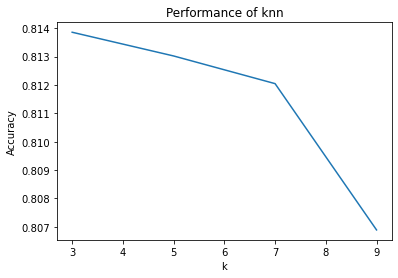

In [65]:
accuracies=[]
ks = [3,5,7,9]
for k in ks:
    knn=KNN(k=k, dist_metric=euclidean)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [66]:
three, five, seven, nine = accuracies
print('k=3 ', three)
print('k=5 ', five)
print('k=7 ', seven)
print('k=9 ', nine)

k=3  0.8138594534300055
k=5  0.8130228667038483
k=7  0.8120468488566648
k=9  0.8068878973786949


<br/>